<a href="https://colab.research.google.com/github/zia207/01_Generalized_Linear_Models_R/blob/main/Notebook/02_01_08_02_glm_gam_smoothing_r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](http://drive.google.com/uc?export=view&id=1bLQ3nhDbZrCCqy_WCxxckOne2lgVvn3l)

# 7.2 Standard GAM Models with Different Smoothing Functions

Generalized Additive Models (GAMs) rely heavily on smoothing functions to estimate the non-linear relationships between predictors and the response. While the overall structure of a GAM remains additive, the choice of smoothing function (or basis type) affects model flexibility, interpretability, computational efficiency, and how well it fits different types of patterns (e.g., periodic, spatial, or abrupt changes).

## Overview

Generalized Additive Models (GAMs) are a flexible extension of generalized linear models (GLMs) that allow for non-linear relationships between predictors and the response variable. Unlike GLMs, which assume linear relationships, GAMs model the response as a sum of smooth functions of individual predictors, capturing complex patterns in the data. The smoothing functions determine how flexibly the model fits the data, and different smoothing functions can be used depending on the problem.

### Key Idea

GAMs express the expected response as:  

$$ E(Y) = g^{-1}(\beta_0 + f_1(x_1) + f_2(x_2) + \dots + f_p(x_p)) $$

where $g$ is the link function, $\beta_0$ is the intercept, and $f_i(x_i)$ are smooth, non-linear functions of the predictors $x_i$. The smoothing functions $f_i$ are typically estimated using techniques like splines, which balance fit and smoothness to avoid overfitting.



### Types of Smoothing Functions in GAMs

1. **Splines**:

Splines are piecewise polynomials joined at points called knots, ensuring smoothness. Common types include:

   - `Cubic Splines`: Smooth curves with continuous first and second derivatives.
   - `Thin Plate Splines`: Multidimensional smoothing for spatial or interaction effects.
   - `B-Splines`: Localized basis functions for flexibility and computational efficiency.
   - `Application`: Modeling continuous predictors with non-linear trends (e.g., temperature effects on energy consumption).
   - `Advantages`:
     - Flexible and computationally efficient.
     - Can capture complex, non-linear patterns.
     - Thin plate splines are useful for spatial data.

2. **Penalized Splines (P-Splines)**:

Combine splines with a penalty term to control smoothness, preventing overfitting by penalizing excessive wiggliness.

   - `Application` Time-series data or longitudinal studies where smooth trends are needed (e.g., stock price modeling).
   - `Advantages`:
     - Automatic smoothness selection via penalties.
     - Robust to knot placement.
     - Balances fit and complexity.

3. **Gaussian Process Smoothers**:

Use a Gaussian process to define a flexible, non-parametric smooth function, often with a covariance kernel (e.g., radial basis function).

   - `Application`: Modeling complex, non-linear relationships in high-dimensional data (e.g., machine learning applications).
   - `Advantages`:
     - Highly flexible for irregular data patterns.
     - Incorporates uncertainty quantification.
     - Suitable for Bayesian GAM frameworks.

4. **Local Regression (LOESS/LOWESS)**:

Fits a smooth curve by performing weighted regression in local neighborhoods of the data.

   - `Application`: Exploratory data analysis or when data has localized patterns (e.g., air pollution levels over time).
   - `Advantages`:
     - Intuitive and adaptive to local data structures.
     - Less sensitive to global assumptions.
     - Easy to implement for visualization.

5. **Tensor Product Smoothers**:

Used for modeling interactions between multiple predictors by constructing smooth functions as products of univariate smooths.

   - `Application`: Modeling interactions in multidimensional data (e.g., spatial-temporal trends in climate modeling).
   - `Advantages`:
     - Handles multivariate relationships effectively.
     - Flexible for modeling interactions without assuming specific forms.

### Application

- `Environmental Science`: Modeling non-linear effects of variables like temperature, precipitation, or pollution on ecological outcomes.
- `Finance`: Capturing non-linear trends in stock prices or risk factors.
- `Healthcare`: Modeling dose-response relationships or patient outcomes over time.
- `Marketing`: Analyzing non-linear effects of advertising spend or customer behavior.
- `Machine Learning`: Used in interpretable models for non-linear feature relationships.

### Advantages of GAMs with Different Smoothing Functions

1. `Flexibility`: Smoothing functions allow GAMs to model complex, non-linear relationships without specifying a parametric form.
2. `Interpretability`: Each predictor’s effect is modeled independently, making it easier to understand individual contributions compared to black-box models.
3. `Modularity`: Different smoothing functions can be applied to different predictors, tailoring the model to the data’s structure.
4. **Robustness**: Penalized smoothers (e.g., P-splines) prevent overfitting by balancing fit and smoothness.
5. **Scalability**: Modern implementations (e.g., in R’s `mgcv` package) handle large datasets and complex models efficiently.
6. **Adaptability**: Smoothing functions can be combined with categorical variables, interactions, or hierarchical structures.

### Considerations

- **Choice of Smoother**: The choice depends on the data’s characteristics (e.g., dimensionality, noise level, or need for interpretability). For example, P-splines are robust for most applications, while tensor products are better for interactions.
- **Computational Cost**: Some smoothers (e.g., Gaussian processes) are computationally intensive for large datasets.
- **Tuning**: Smoothing parameters (e.g., penalty terms) often require careful tuning, though modern software automates this via methods like cross-validation or REML (Restricted Maximum Likelihood).



## Fit GAM Models with Different Smoothing Functions in R

In the context of the `gam()` function from the {mgcv} package in R, **smoothing functions** (or **smooth terms**) are tools used to model non-linear relationships between predictors and the response variable. They allow the data to determine the shape of the relationship, rather than assuming a fixed functional form like linear or polynomial.


Common Smoothing Functions in `gam()`:

1. **`s()`**:
   - The most commonly used smoothing function in `gam()`.
   - Fits univariate or multivariate smooths using basis functions (e.g., splines).
   - Allows for flexible, data-driven modeling of non-linear effects.

   Example:
   ```R
   gam_model <- gam(y ~ s(x), data = dataset)
   ```

   Options within `s()`:
   - **`bs`**: Specifies the type of basis (default: "tp" for thin plate regression splines).
   - **`k`**: Controls the number of basis functions (higher values allow more flexibility).
   - **`fx`**: If `TRUE`, fits a fixed degree of smoothness.
   - **`by`**: Allows interaction with a categorical variable.

2. **`te()`**: Tensor product smooths
   - Models interactions between two or more predictors.
   - Useful when predictors are measured on different scales or units.

   Example:
   ```R
   gam_model <- gam(y ~ te(x1, x2), data = dataset)
   ```

3. **`ti()`**: Tensor interaction smooth
   - Similar to `te()` but fits an interaction without the main effects.

   Example:
   ```R
   gam_model <- gam(y ~ ti(x1, x2), data = dataset)
   ```

4. **`bs="cr"` (Cubic Regression Splines):**
   - A specific basis used within `s()`.
   - A good alternative to the default thin-plate regression splines.

   Example:
   ```R
   gam_model <- gam(y ~ s(x, bs = "cr"), data = dataset)
   ```

5. **`bs="cc"` (Cyclic Cubic Splines):**
   - Used for variables with cyclic behavior, like time of day or seasons.
   - Ensures the smooth term ends at the same value where it starts.

   Example:
   ```R
   gam_model <- gam(y ~ s(x, bs = "cc"), data = dataset)
   ```

6. **`bs="cs"` (Shrinkage Cubic Splines):**
   - Allows the model to shrink smooth terms to zero if the data supports it.

   Example:
   ```R
   gam_model <- gam(y ~ s(x, bs = "cs"), data = dataset)
   ```
   
7.  **`bs="tp"` (Thin plate regression spline (default):**
   - Allows the model to shrink smooth terms to zero if the data supports it.

   Example:
   ```R
   gam_model <- gam(y ~ s(x, bs = "tp"), data = dataset)
   ```

8. **`s()` with multiple predictors:**
   - Models multivariate smooths using multiple variables within one `s()` term.
   - Useful for non-linear interactions.

   Example:
   ```R
   gam_model <- gam(y ~ s(x1, x2), data = dataset)
   ```

Key Features of Smoothing in `gam()`:

1. **Automatic Smoothness Selection**:
   - `gam()` automatically determines the level of smoothness using techniques like **generalized cross-validation (GCV)** or **restricted maximum likelihood (REML)**.

2. **Penalty for Overfitting**:
   - Smoothness selection penalizes overly flexible models to prevent overfitting.

3. **Basis Dimension (`k`)**:
   - Determines the maximum complexity of the smooth.
   - Example: `s(x, k = 10)` uses 10 basis functions.

4. **Visualization**:
   - Smooth terms are easy to interpret visually using `plot()`.

   Example:
   ```R
   plot(gam_model, pages = 1)

## Install rpy2

In [1]:
!pip uninstall rpy2 -y
!pip install rpy2==3.5.1
%load_ext rpy2.ipython

Found existing installation: rpy2 3.5.17
Uninstalling rpy2-3.5.17:
  Successfully uninstalled rpy2-3.5.17
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.7/201.7 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rpy2: filename=rpy2-3.5.1-cp312-cp312-linux_x86_64.whl size=316565 sha256=72353e79cc8497ac62a6a8bf870e962d88b711d0278200bf0129d904104a791d
  Stored in directory: /root/.cache/pip/wheels/00/26/d5/d5e8c0b039915e785be870270e4a9263e5058168a03513d8cc
Successfully built rpy2


## Mount Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Install Required R Packages

Following R packages are required to run this notebook. If any of these packages are not installed, you can install them using the code below:

In [3]:
%%R
packages <- c('tidyverse',
     'plyr',
		 'rstatix',
		 'MASS',
	   'gam',
 		 'mgcv',
		 'gamlr',
 		 'gamlss',
 		 'gratia',
 		 #'itsadug',  # we will load this package later
 		 'agridat' ,
		 'performance',
		 'purrr'
	  	)

In [ ]:
%%R
# Install missing packages
new.packages <- packages[!(pkg %in% installed.packages(lib='drive/My Drive/R/')[,"Package"])]
if(length(new.packages)) install.packages(new.packages, lib='drive/My Drive/R/')

In [4]:
%%R
# set library path
.libPaths('drive/My Drive/R')
# Verify installation
cat("Installed packages:\n")
print(sapply(packages, requireNamespace, quietly = TRUE))

Installed packages:
  tidyverse        plyr     rstatix        MASS         gam        mgcv 
       TRUE        TRUE        TRUE        TRUE        TRUE        TRUE 
      gamlr      gamlss      gratia     agridat performance       purrr 
      FALSE        TRUE        TRUE        TRUE        TRUE        TRUE 


### Load packages

In [7]:
%%R
# set library path
.libPaths('drive/My Drive/R')
# Load packages with suppressed messages
invisible(lapply(packages, function(pkg) {
  suppressPackageStartupMessages(library(pkg, character.only = TRUE))
}))
# Check loaded packages
cat("Successfully loaded packages:\n")
print(search()[grepl("package:", search())])# Check loaded packages

Successfully loaded packages:
 [1] "package:performance" "package:agridat"     "package:gratia"     
 [4] "package:gamlss"      "package:parallel"    "package:gamlss.dist"
 [7] "package:gamlss.data" "package:gamlr"       "package:Matrix"     
[10] "package:mgcv"        "package:nlme"        "package:gam"        
[13] "package:foreach"     "package:splines"     "package:MASS"       
[16] "package:rstatix"     "package:plyr"        "package:lubridate"  
[19] "package:forcats"     "package:stringr"     "package:dplyr"      
[22] "package:purrr"       "package:readr"       "package:tidyr"      
[25] "package:tibble"      "package:ggplot2"     "package:tidyverse"  
[28] "package:tools"       "package:stats"       "package:graphics"   
[31] "package:grDevices"   "package:utils"       "package:datasets"   
[34] "package:methods"     "package:base"       


### Data

In this exercise, we utilize a [dataset](https://raw.githubusercontent.com/m-clark/generalized-additive-models/master/data/pisasci2006.csv) that includes average science scores by country from the Programme for International Student Assessment ([PISA](https://www.oecd.org/en/about/programmes/pisa.html)) conducted in 2006. Alongside these scores, we also consider [data](https://hdr.undp.org/data-center) from the United Nations, which includes Gross National Income (GNI) per capita (adjusted for Purchasing Power Parity in 2005 dollars), the Educational Index, the Health Index, and the Human Development Index (HDI).

The education component is measured by the mean years of schooling for adults aged 25 years and older and the expected years of schooling for children of school entry Income. The health index is determined by life expectancy at birth, while the wealth component is based on GNI per capita. The HDI establishes minimum and maximum values for each dimension, with the resulting scores indicating each country's position relative to these endpoints, expressed as a value between 0 and 1.

The key variables are as follows (variable abbreviations in bold):

-   **Overall** Science Score (average score for 15 year olds)

-   **Interest** in science

-   Identifying scientific **Issues**

-   **Explaining** phenomena scientifically

-   **Support** for scientific inquiry

-   **Income** Index

-   **Health** Index

-   **Edu**cation Index

-   **H**uman **D**evelopment **I**ndex (composed of the Income index, Health Index, and Education Index)

We will use `read_csv()` function of {readr} package to import data as a **tidy** data.

In [8]:
%%R
# Load data
mf<-readr::read_csv("https://raw.githubusercontent.com/m-clark/generalized-additive-models/master/data/pisasci2006.csv")
# Remove missing values
mf<-na.omit(mf)
str(mf)

  method   from  
  print.ri gamlss



Rows: 65 Columns: 11
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): Country
dbl (10): Overall, Issues, Explain, Evidence, Interest, Support, Income, Hea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
tibble [52 × 11] (S3: tbl_df/tbl/data.frame)
 $ Country : chr [1:52] "Argentina" "Australia" "Austria" "Belgium" ...
 $ Overall : num [1:52] 391 527 511 510 390 434 534 438 542 388 ...
 $ Issues  : num [1:52] 395 535 505 515 398 427 532 444 528 402 ...
 $ Explain : num [1:52] 386 520 516 503 390 444 531 432 549 379 ...
 $ Evidence: num [1:52] 385 531 505 516 378 417 542 440 542 383 ...
 $ Interest: num [1:52] 567 465 507 503 592 523 469 591 536 644 ...
 $ Support : num [1:52] 506 487 515 492 519 527 501 564 529 546 ...
 $ Income  : num [1:52] 0.678 0.826 0.835 0.831 0.637 0.663 0.84 0.673 0.853 0.616 ...
 $ Health  : num [

#### Split Data

We will split the data into training and testing sets, The training set will contain 70% of the data, and the testing set will contain the remaining 30%.

In [9]:
%%R
# set the seed to make your partition reproducible
seeds = 11076
## 75% of the sample size
smp_size <- floor(0.75 * nrow(mf))
## set the seed to make your partition reproducible
set.seed(123)
train_ind <- sample(seq_len(nrow(mf)), size = smp_size)
train <- mf[train_ind, ]
test <- mf[-train_ind, ]


### Fit Four GAM Models with Different Smoothers

In [10]:
%%R
# Thin Plate Regression Spline (bs = "tp")
gam.tp <- gam(Overall ~ s(Income, bs="tp", k=15) +
                        s(Edu, bs="tp", k=15) +
                        s(Health, bs="tp", k=15) +
                        s(Interest, bs="tp", k=15),
                        method="REML",
                        data = train)

# Cubic Regression Spline (bs = "cr")
gam.cr <- gam(Overall ~ s(Income, bs="cr", k=15) +
                        s(Edu, bs="cr", k=15) +
                        s(Health, bs="cr", k=15) +
                        s(Interest, bs="cr", k=15),
                        method="REML",
                        data = train)

#  cubic-spline ((not ideal here, but for comparison
gam.cc <- gam(Overall ~ s(Income, bs="cc", k=15) +
                        s(Edu, bs="cc", k=15) +
                        s(Health, bs="cc", k=15) +
                        s(Interest, bs="cc", k=15),
                        method="REML",
                        data = train)
# Shrinkage Smoother (bs = "ts")
gam.ts <- gam(Overall ~ s(Income, bs = "ts", k=15) +
                        s(Health, bs = "ts", k=15) +
                        s(Edu, bs = "ts", k=15) +
                        s(Interest, bs = "ts", k=15),
              data = train, method = "REML")
# Penalized Spline (bs = "ps")
gam.ps <- gam(Overall ~ s(Income, bs = "ps", k=15) +
                        s(Health, bs = "ps", k=15) +
                        s(Edu, bs = "ps", k=15) +
                        s(Interest, bs = "ps", k=15),
              data = train, method = "REML")

In [12]:
%%R
# Compare models using AIC
AIC(gam.tp, gam.cr, gam.cc, gam.ts, gam.ps)

              df      AIC
gam.tp 14.564451 368.0780
gam.cr 14.241284 368.0626
gam.cc 13.681134 378.5195
gam.ts  9.449641 370.5709
gam.ps 13.916798 367.9573


The effective degrees of freedom (EDF) gives a sense of the smoothness of each term. Higher EDF values indicate a more flexible curve, while lower values indicate more smoothing.

In [13]:
%%R
summary(gam.tp)$edf
summary(gam.cr)$edf
summary(gam.cc)$edf
summary(gam.ts)$edf
summary(gam.ps)$edf

[1] 4.365040 1.000004 1.000135 3.777565


#### Visualize the Smooth Terms

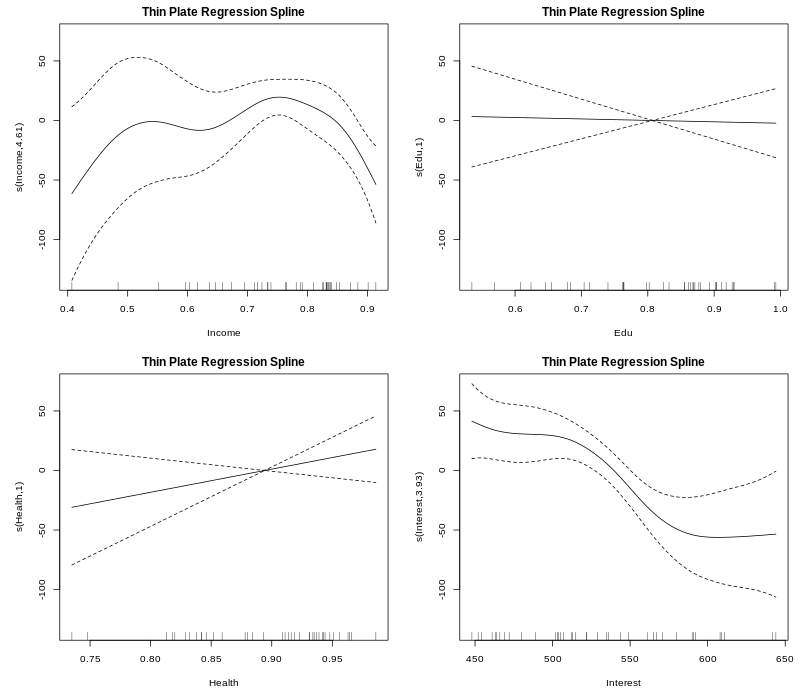

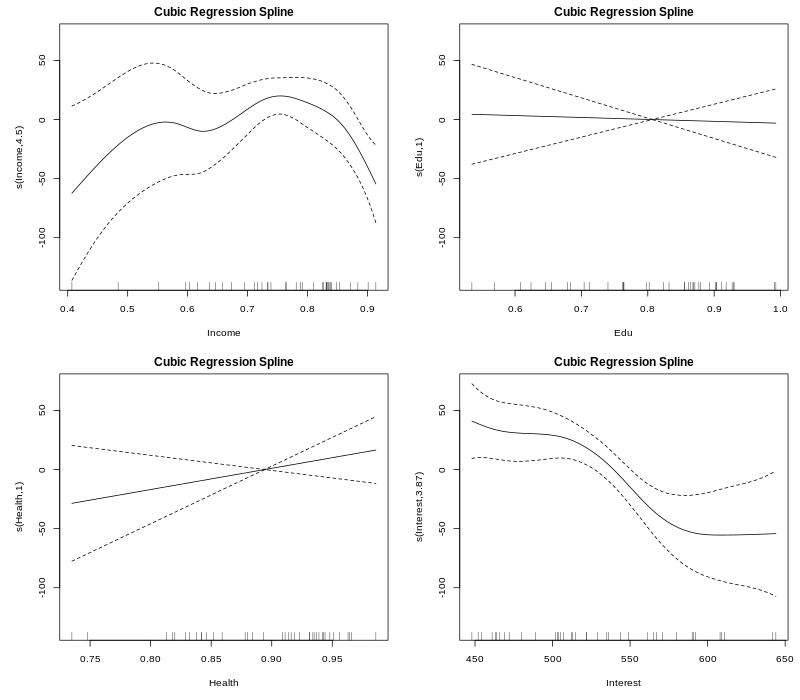

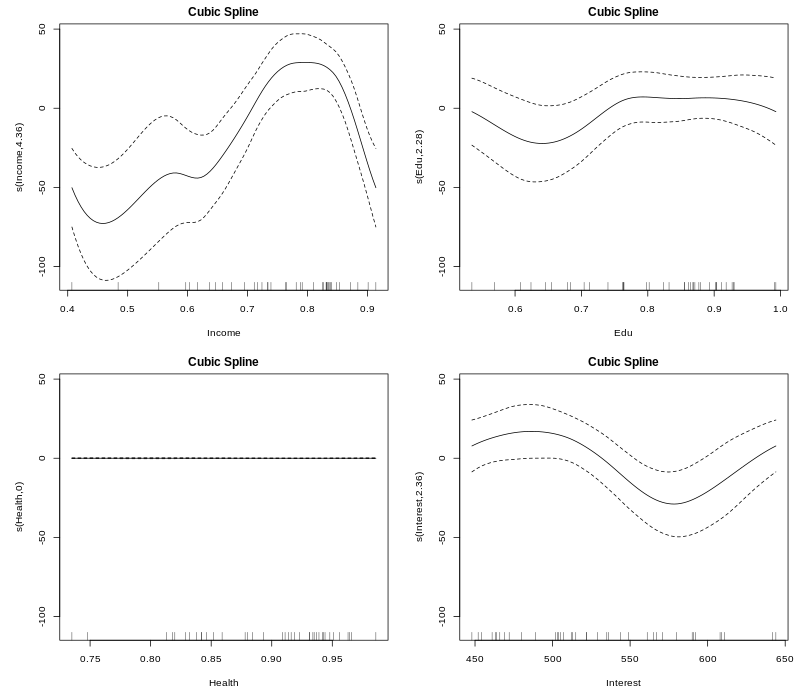

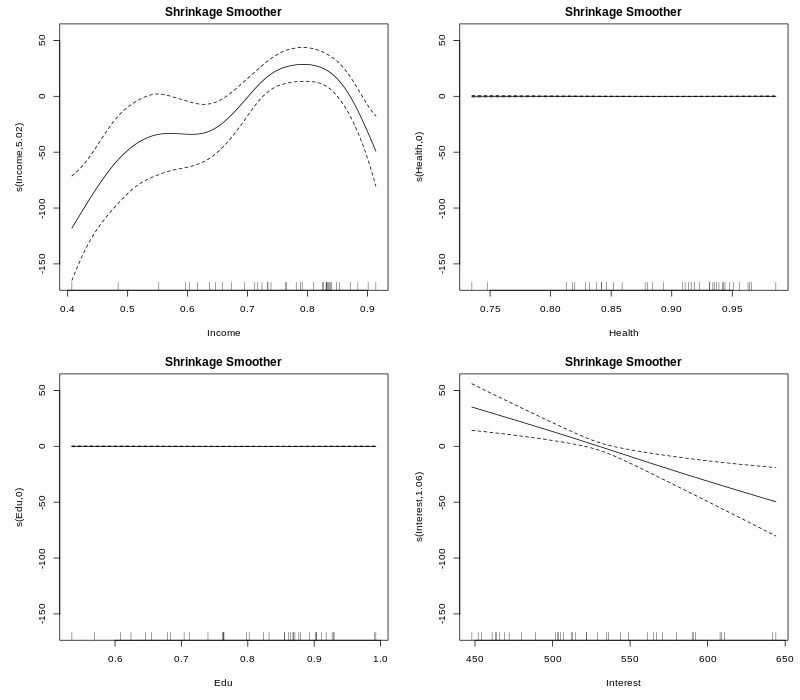

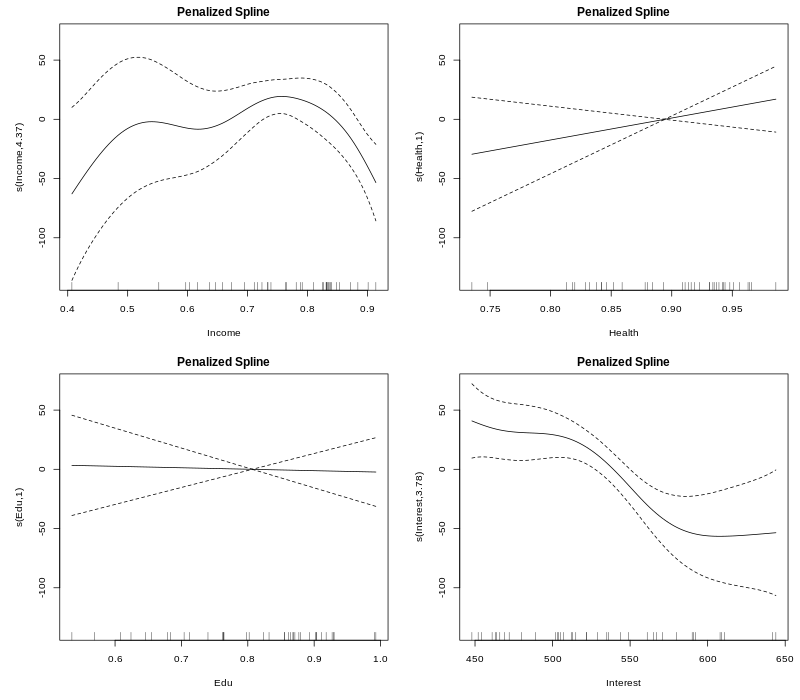

In [14]:
%%R -w 800 -h 700 -u px
# Visualize the smooth terms for each model
par(mfrow=c(2,2))
plot(gam.tp, pages=1, main="Thin Plate Regression Spline")
plot(gam.cr, pages=1, main="Cubic Regression Spline")
plot(gam.cc, pages=1, main="Cubic Spline")
plot(gam.ts, pages=1, main="Shrinkage Smoother")
plot(gam.ps, pages=1, main="Penalized Spline")

#### Validate All Models on Test Set

To validate the models on the test set, we will use the `predict()` function to get predictions from each model and then compute performance metrics such as RMSE (Root Mean Squared Error), MAE (Mean Absolute Error), and R² (Coefficient of Determination).

In [15]:
%%R
evaluate_model <- function(model, test_data) {
  # Use predict() to get predictions
  pred <- predict(model, newdata = test_data)

  # Extract actual outcome
  actual <- test_data$Overall

  # Compute metrics
  rmse <- sqrt(mean((actual - pred)^2))
  mae <- mean(abs(actual - pred))
  r2 <- cor(actual, pred)^2  # Squared correlation (approximates R² for test set)

  # Return as tibble
  tibble(RMSE = rmse, MAE = mae, R2 = r2)
}

In [16]:
%%R
results <- tibble(
  Model = c("Thin Plate (tp)", "Cubic Regression (cr)", "P-Spline (ps)", "Shrinkage (ts)"),
  ModelObj = list(gam.tp, gam.cr, gam.ps, gam.ts)
) %>%
  mutate(metrics = map(ModelObj, evaluate_model, test_data = test)) %>%
  unnest(metrics) %>%
  arrange(RMSE)

# Print results
print(results)

# A tibble: 4 × 5
  Model                 ModelObj  RMSE   MAE    R2
  <chr>                 <list>   <dbl> <dbl> <dbl>
1 Shrinkage (ts)        <gam>     25.0  18.6 0.719
2 Cubic Regression (cr) <gam>     32.1  25.5 0.589
3 Thin Plate (tp)       <gam>     32.6  25.9 0.578
4 P-Spline (ps)         <gam>     32.8  26.1 0.577


### Smoothing Parameter Search via Grid Search

To perform a grid search over different smoothing functions and parameters, we can define a function that fits a GAM model with specified basis type (`bs`) and knot number (`k`), then evaluates the model on the test set. We will use `purrr::pmap()` to iterate over combinations of `bs` and `k`.

We’ll test:

- Different `bs: "tp", "cr", "ps"`

- Different `k values: e.g., k = 4, 6, 8`


####  Function to Fit and Evaluate Models

In [17]:
%%R
# Ealuation function — returns only metrics
fit_and_evaluate <- function(.bs, .k) {
  tryCatch({
    # Build formula dynamically
    formula_str <- paste0(
      "Overall ~ s(Income, bs='", .bs, "', k=", .k, ")",
      " + s(Health, bs='", .bs, "', k=", .k, ")",
      " + s(Edu, bs='", .bs, "', k=", .k, ")",
      " + s(Interest, bs='", .bs, "', k=", .k, ")"
    )

    model <- gam(as.formula(formula_str), data = train, method = "REML")
    pred <- predict(model, newdata = test)
    actual <- test$Overall

    rmse <- sqrt(mean((actual - pred)^2))
    mae <- mean(abs(actual - pred))
    r2 <- cor(actual, pred)^2

    # Only return metrics — avoid duplicating bs, k
    tibble(RMSE = rmse, MAE = mae, R2 = r2)

  }, error = function(e) {
    # Return NA on failure
    tibble(RMSE = NA_real_, MAE = NA_real_, R2 = NA_real_)
  })
}

#### Grid Search  for the Best Model

In [18]:
%%R
# Define grid
grid <- expand.grid(
  bs = c("tp", "cr", "ps"),
  k = c(4, 6, 8),
  stringsAsFactors = FALSE
) %>%
  as_tibble()

# Apply function and unnest safely
search_results <- grid %>%
  mutate(results = pmap(list(bs, k), fit_and_evaluate)) %>%
  unnest(results) %>%
  arrange(RMSE)

# View best models
print(search_results)

# A tibble: 9 × 5
  bs        k  RMSE   MAE    R2
  <chr> <dbl> <dbl> <dbl> <dbl>
1 ps        4  31.6  23.5 0.750
2 tp        8  32.4  25.8 0.584
3 cr        4  32.8  25.4 0.590
4 ps        8  32.9  26.1 0.582
5 tp        6  34.8  27.4 0.528
6 cr        6  36.8  28.8 0.486
7 cr        8  36.9  28.9 0.491
8 tp        4  37.9  29.6 0.463
9 ps        6  38.6  29.9 0.458


#### Best Model Selection


In [19]:
%%R
best_model <- search_results[1, ]
cat("Best model:\n")
print(best_model)

# Refit best model on full grid spec if desired
best_bs <- best_model$bs
best_k <- best_model$k

final_model <- gam(Overall ~ s(Income, bs = best_bs, k = best_k) +
                             s(Health, bs = best_bs, k = best_k) +
                             s(Edu, bs = best_bs, k = best_k) +
                             s(Interest, bs = best_bs, k = best_k),
                   data = train, method = "REML")

summary(final_model)

Best model:
# A tibble: 1 × 5
  bs        k  RMSE   MAE    R2
  <chr> <dbl> <dbl> <dbl> <dbl>
1 ps        4  31.6  23.5 0.750

Family: gaussian 
Link function: identity 

Formula:
Overall ~ s(Income, bs = best_bs, k = best_k) + s(Health, bs = best_bs, 
    k = best_k) + s(Edu, bs = best_bs, k = best_k) + s(Interest, 
    bs = best_bs, k = best_k)

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  472.718      4.475   105.6   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
              edf Ref.df     F p-value   
s(Income)   2.216  2.462 6.454 0.01231 * 
s(Health)   1.724  2.001 1.430 0.24985   
s(Edu)      1.000  1.000 0.127 0.72370   
s(Interest) 1.000  1.000 8.041 0.00786 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

R-sq.(adj) =  0.765   Deviance explained = 80.2%
-REML = 162.39  Scale est. = 781.16    n = 39


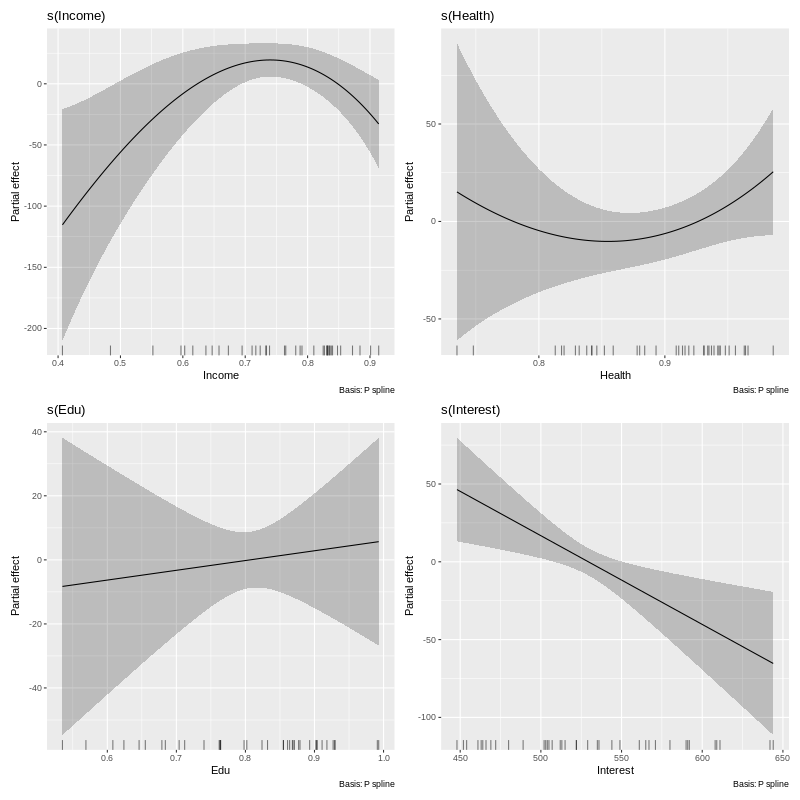

In [20]:
%%R -w 800 -h 800 -u px
## Enhanced visualization
gratia::draw(final_model) # Generates nicely formatted plots

Automatically we select the best model based on AIC and visualize the smooth terms. We can also compare different types of smooths using the `itsadug` package, which provides tools for working with GAMs.

In [ ]:
%%R
library(itsadug)

In [22]:
%%R
# List of smoothing basis types to test
smooth_types <- c("tp", "cr", "cc")

# Fit models with each type of smooth and calculate AIC
models <- purrr::map(smooth_types, ~ gam(Overall ~
            s(Income, bs = .x) +
            s(Edu, bs = .x) +
            s(Health, bs =.x) +
            s(Interest, bs =.x),
            data = train,
            method = "REML"))


aic_values <- map_dbl(models, AIC)

# Find the best model by minimum AIC
best_model <- models[[which.min(aic_values)]]
summary(best_model)


Family: gaussian 
Link function: identity 

Formula:
Overall ~ s(Income, bs = .x) + s(Edu, bs = .x) + s(Health, bs = .x) + 
    s(Interest, bs = .x)

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  472.718      2.965   159.4   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
              edf Ref.df     F p-value   
s(Income)   5.237  6.117 5.454 0.00133 **
s(Edu)      5.068  5.919 1.834 0.13561   
s(Health)   1.603  1.948 0.182 0.80486   
s(Interest) 3.249  3.996 1.680 0.19019   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

R-sq.(adj) =  0.897   Deviance explained = 93.8%
-REML = 164.75  Scale est. = 342.87    n = 39


#### Model Performance


In [24]:
%%R
performance::performance(final_model)

# Indices of model performance

AIC     |    AICc |     BIC |    R2 |   RMSE |  Sigma
-----------------------------------------------------
379.731 | 385.154 | 393.810 | 0.765 | 25.341 | 27.949


#### Prediction at Test Data

The `predict()` function will be used to predict the Overall Score at the test data. This will help to validate the accuracy of the GAM model.

We will use `pb()` is the shorthand for fitting smoothing function.

In [25]:
%%R
# Predict the Overall Score at the test data
test$Pred.Overall<-as.data.frame(predict(final_model, newdata = test, type = "response", se=TRUE))

# Compute the MSE
mse <- mean((test$Overall- test$Pred.Overall$fit)^2)
print(paste("MSE:", round(mse, 4)))

[1] "MSE: 1000.8389"



  method                  from   
  heightDetails.titleGrob ggplot2
  widthDetails.titleGrob  ggplot2

Attaching package: ‘ggpp’



    annotate




`geom_smooth()` using formula = 'y ~ x'


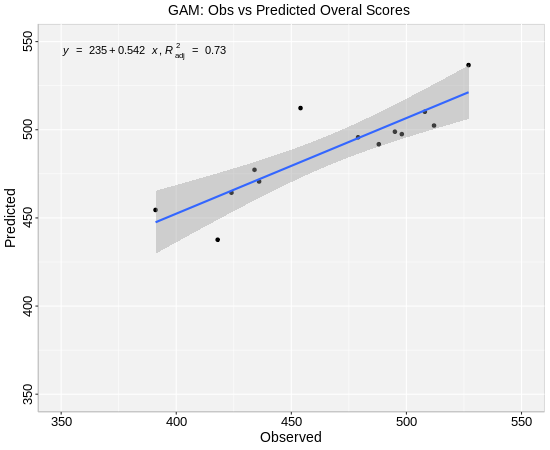

In [26]:
%%R -w 550 -h 450 -u px
# load the ggpmisc package
library(ggpmisc)
formula<-y~x
# Plot the observed vs predicted Overall Scores
ggplot(test, aes(Overall,Pred.Overall$fit)) +
  geom_point() +
  geom_smooth(method = "lm")+
  stat_poly_eq(use_label(c("eq", "adj.R2")), formula = formula) +
  ggtitle("GAM: Obs vs Predicted Overal Scores ") +
  xlab("Observed") + ylab("Predicted") +
  scale_x_continuous(limits=c(350,550), breaks=seq(350, 550, 50))+
  scale_y_continuous(limits=c(350,550), breaks=seq(350, 550, 50)) +
  # Flip the bars
  theme(
    panel.background = element_rect(fill = "grey95",colour = "gray75",size = 0.5, linetype = "solid"),
    axis.line = element_line(colour = "grey"),
    plot.title = element_text(size = 14, hjust = 0.5),
    axis.title.x = element_text(size = 14),
    axis.title.y = element_text(size = 14),
    axis.text.x=element_text(size=13, colour="black"),
    axis.text.y=element_text(size=13,angle = 90,vjust = 0.5, hjust=0.5, colour='black'))

The plot shows the observed Overall Scores on the x-axis and the predicted Overall Scores on the y-axis. The points represent the observed values, while the line represents the fitted regression line. The equation of the regression line and the adjusted R-squared value are displayed on the plot. The plot shows a strong positive relationship between the observed and predicted Overall Scores, indicating that the GAM model is able to accurately predict the Overall Scores.

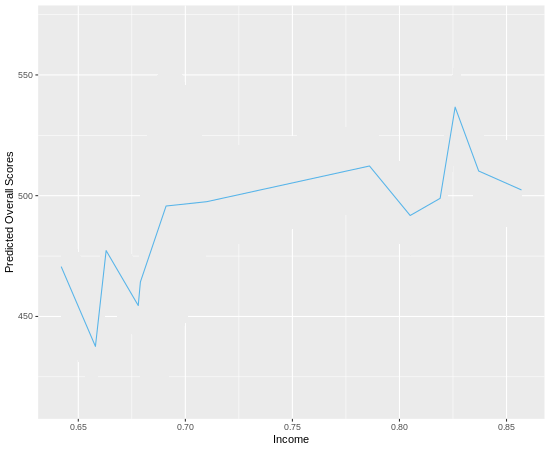

In [27]:
%%R -w 550 -h 450 -u px
test<-test |>
  dplyr::mutate(lower = Pred.Overall$fit - 1.96 * Pred.Overall$se.fit,
         upper = Pred.Overall$fit + 1.96 * Pred.Overall$se.fit)

ggplot(aes(x = Income, y = Pred.Overall$fit), data = test) +
  geom_ribbon(aes(ymin = lower, ymax = upper), fill = 'gray92') +
  geom_line(color = '#56B4E9')+
  xlab("Income") + ylab("Predicted Overall Scores")

The plot shows the predicted Overall Scores as a function of Income, with a 95% confidence interval around the estimate. The shaded area represents the 95% confidence interval, while the line represents the estimated relationship between Income and Overall Scores. The plot shows a non-linear relationship between Income and Overall Scores, with the Overall Scores increasing with Income up to a certain point and then leveling off.


## Summary and Conclusion

GAMs with different smoothing functions provide a powerful framework for modeling non-linear relationships in a flexible and interpretable way. By selecting appropriate smoothers (e.g., splines, P-splines, or Gaussian processes), GAMs can be tailored to a wide range of applications, offering a balance between flexibility, robustness, and computational efficiency. They are particularly valuable when linear models are too restrictive, but fully non-parametric models are too complex or uninterpretable.

In this notebook, we explored the use of Generalized Additive Models (GAMs) for modeling non-linear relationships in data. We fitted several GAM models with different smoothing functions and compared their performance using metrics like RMSE, MAE, and R². We also performed a grid search to find the best combination of smoothing function and parameters. The final model was validated on a test set, and we visualized the smooth terms and the relationship between predictors and the response variable. At the end, we successfully predicted the Overall Science Scores using the GAM model, demonstrating its effectiveness in capturing complex relationships in the data.

## References

1. **Wood, S. N. (2017).** *Generalized Additive Models: An Introduction with R* (2nd ed.).  
   – The definitive guide by the `mgcv` author. Covers thin plate, cubic, P-splines, and tensor smooths with full R code.

2. **Zuur et al. (2018).** *Beginner’s Guide to GAMs with R*.  
   – Practical ecological examples using `mgcv`: cyclic, spatial, and temporal smoothers.

3. **Hastie & Tibshirani (1990).** *Generalized Additive Models*.  
   – Foundational text; introduces backfitting and spline smoothing (no R, but key theory).

4. **Wood, S. N. (2006).** *GAMs: An Introduction with R* (1st ed.).  
   – Early version of the 2017 book; solid intro to penalized splines and `mgcv`.

5. **mgcv R package documentation (Wood, 2023).**  
   – Official guide: explains `s()`, `te()`, and basis types (`bs = "tp"`, `"cr"`, `"ps"`, `"cc"`).  
   [CRAN - mgcv](https://cran.r-project.org/web/packages/mgcv/)


